In [1]:
!jupyter nbconvert --to script Hanatest_jupi.ipynb


[NbConvertApp] Converting notebook Hanatest_jupi.ipynb to script
[NbConvertApp] Writing 9032 bytes to Hanatest_jupi.py


In [ ]:
# TEST WITH 100 LINES OF DATA

In [120]:
ls

 Le volume dans le lecteur C s'appelle Windows
 Le num�ro de s�rie du volume est 4CF4-9739

 R�pertoire de C:\Users\fredh\PycharmProjects\hanatest

03/10/2018  08:25    <DIR>          .
03/10/2018  08:25    <DIR>          ..
03/10/2018  08:25    <DIR>          .idea
28/09/2018  16:05    <DIR>          .ipynb_checkpoints
01/10/2018  13:21    <DIR>          __pycache__
03/10/2018  08:25            90�984 Hanatest_jupi.ipynb
28/09/2018  15:59               610 testjupi.ipynb
29/09/2018  12:27    <DIR>          venv
               2 fichier(s)           91�594 octets
               6 R�p(s)  127�191�945�216 octets libres


In [125]:
#test

d = {'col1': [1, 2], 'col2': [3, 4]}  #DICTIONARY
df = pd.DataFrame(data=d)             #Dataframe
df

,col1,col2
0,1,3
1,2,4


In [4]:
import pyhdb
from pylab import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [4]:
get_ipython().run_line_magic('matplotlib', 'inline')



In [424]:
#  CREATE TABLE WITH COLUMN NAMES IN HANA

"""create column table bike_train_col as
(
SELECT COLUMN_NAME FROM SYS.TABLE_COLUMNS WHERE TABLE_NAME = 'bike_train' and SCHEMA_NAME = 'FRED' ORDER BY POSITION 
); 

"""

"create column table bike_train_col as\n(\nSELECT COLUMN_NAME FROM SYS.TABLE_COLUMNS WHERE TABLE_NAME = 'bike_train' and SCHEMA_NAME = 'FRED' ORDER BY POSITION \n); \n\n"

In [ ]:
"""
Data Fields

datetime - hourly date + timestamp  
season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
holiday - whether the day is considered a holiday
workingday - whether the day is neither a weekend nor holiday
weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
temp - temperature in Celsius
atemp - "feels like" temperature in Celsius
humidity - relative humidity
windspeed - wind speed
casual - number of non-registered user rentals initiated
registered - number of registered user rentals initiated
count - number of total rentals

"""

In [7]:
# WORKS
#Source: Bike Train

connection = pyhdb.connect('hana4.micropole.loc', 30215, 'FRED', '1h882W28') #
cursor = connection.cursor()
cursor.execute('SELECT TOP 100 *  from "FRED"."bike_train"')

name=cursor.description     # Get columns
name2=[]
for col in range(len(name)):
    name2.append( cursor.description[col][0])
    
#ALTERNATIVE TO MAKE LIST OF COLS: values = ','.join(str(v) for v in df.head(5))

df=pd.DataFrame.from_records(cursor.fetchall(), columns=name2) #,columns=columns; 

print( df.head() , '\n' ,'\n' ,'Dimension: ', df.shape,'\n' )


              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   
1  2011-01-02 22:00:00       1        0           0        1  9.84  10.605   
2  2011-01-02 23:00:00       1        0           0        1  9.02  11.365   
3  2011-01-03 00:00:00       1        0           1        1  9.02    9.85   
4  2011-01-03 01:00:00       1        0           1        1   8.2   8.335   

   humidity windspeed  casual  registered  count  
0        75         0       0           1      1  
1        44   19.9995       0           9      9  
2        47   11.0014       0           8      8  
3        44   23.9994       0           5      5  
4        44   27.9993       0           2      2   
 
 Dimension:  (100, 12) 



In [8]:
(cursor.description)

(('datetime', 11, None, 19, 0, None, 2),
 ('season', 1, None, 3, 0, None, 2),
 ('holiday', 2, None, 5, 0, None, 2),
 ('workingday', 2, None, 5, 0, None, 2),
 ('weather', 1, None, 3, 0, None, 2),
 ('temp', 5, None, 7, 2, None, 2),
 ('atemp', 5, None, 9, 3, None, 2),
 ('humidity', 2, None, 5, 0, None, 2),
 ('windspeed', 5, None, 11, 4, None, 2),
 ('casual', 2, None, 5, 0, None, 2),
 ('registered', 2, None, 5, 0, None, 2),
 ('count', 2, None, 5, 0, None, 2))

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
datetime      100 non-null object
season        100 non-null int64
holiday       100 non-null int64
workingday    100 non-null int64
weather       100 non-null int64
temp          100 non-null object
atemp         100 non-null object
humidity      100 non-null int64
windspeed     100 non-null object
casual        100 non-null int64
registered    100 non-null int64
count         100 non-null int64
dtypes: int64(8), object(4)
memory usage: 9.5+ KB


In [10]:
#CATEGORICAL VARIABLES

df.select_dtypes(include=['object']).columns  #select the columns of "dtypes 'object' "

Index(['datetime', 'temp', 'atemp', 'windspeed'], dtype='object')

In [11]:
#change object string type to date type
df['datetime']=pd.to_datetime(df['datetime'])

In [12]:

# Frequency tables for each categorical feature (object type)
for column in df.select_dtypes(include=['object']).columns: #churn.select_dtypes(include=['object']).columns:  # ['State']: 
    display(pd.crosstab(index=df[column], columns='% observations', normalize='columns'))
    
# columns: Values to group by in the columns (here it is the name but can also be col:churn['Churn?'] )
# Normalize by dividing all values by the sum of values over each column (sum(col)=1)

col_0,% observations
temp,
3.28,0.02
4.1,0.13
4.92,0.12
5.74,0.22
6.56,0.13
7.38,0.06
8.2,0.07
9.02,0.06
9.84,0.04


col_0,% observations
atemp,
3.03,0.03
3.79,0.02
4.545,0.04
5.305,0.04
6.06,0.16
6.82,0.09
7.575,0.15
8.335,0.03
9.09,0.07


col_0,% observations
windspeed,
0,0.14
6.0032,0.06
7.0015,0.06
8.9981,0.10
11.0014,0.09
12.998,0.04
15.0013,0.08
16.9979,0.08
19.0012,0.06


In [13]:
df.columns  #df.columns.tolist()

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [14]:
#Convert columns to numeric except DATETIME
cols=[i for i in df.columns if i not in ["datetime"]]
for col in cols:
    df[col]=pd.to_numeric(df[col])

In [15]:
df.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [16]:
type(df.select_dtypes(include=['object']))

pandas.core.frame.DataFrame

In [17]:
#NUMERIC VARIABLES

df.select_dtypes(exclude=['object']).columns  #select the columns of "dtypes 'object' "

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [18]:
#(df[['season']])  not work
#df.count
df.iloc[:,11].head()

0    1
1    9
2    8
3    5
4    2
Name: count, dtype: int64

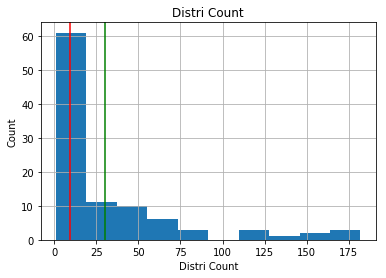

In [19]:
#Distri of count is skewed (maybe caused by outliers)

plt.hist(df['count']) #or df.iloc[:,11]
plt.grid(True)
plt.xlabel('Distri Count')
plt.ylabel('Count')
plt.title('Distri Count')
plt.axvline(df['count'].mean(),color='g')
plt.axvline(df['count'].median(),color='r')

In [20]:
x = np.log1p(100) # log (x+1) reduce also the range of the output
np.expm1(x) # exp(x) - 1

100.00000000000003

In [21]:
df.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [22]:
#Drop unecessary variabes: casual and registered

#df.drop([('registered',),('casual',)], axis=1, inplace=True)   # Old
df.drop(['registered','casual'], axis=1,inplace=True)

In [84]:

# We need to convert datetime to numeric for training.
# Let's extract key features into separate numeric columns
def add_features(df):
    df['year'] = df['datetime'].dt.year
    df['month'] = df['datetime'].dt.month
    df['day'] = df['datetime'].dt.day
    df['dayofweek'] = df['datetime'].dt.dayofweek
    df['hour'] = df['datetime'].dt.hour

In [24]:
add_features(df)

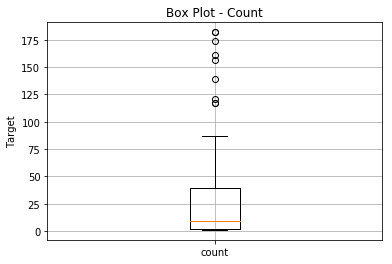

In [27]:
# NO LOG TARGET  => OUTLIERS
plt.boxplot([df['count']], labels=['count'])
plt.title('Box Plot - Count')
plt.ylabel('Target')
plt.grid(True)



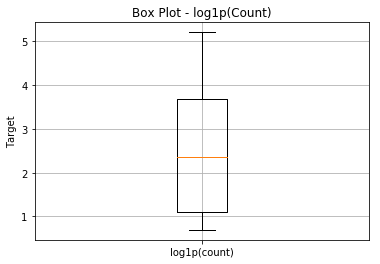

In [28]:
# Let's see how the data distribution changes with log1p
# Evenly distributed
plt.boxplot([df['count'].map(np.log1p)], labels=['log1p(count)'])
plt.title('Box Plot - log1p(Count)')
plt.ylabel('Target')
plt.grid(True)


In [29]:
df['count'] = df['count'].map(np.log1p)

#we use "log" as the distribution of "count" is skewed.

columns2 = ['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed' ]


In [30]:
#plt.hist(df["count"])
type(df)

pandas.core.frame.DataFrame

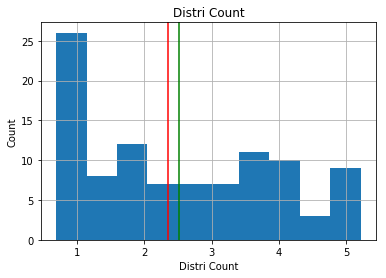

In [31]:
#The distribution of count is less skewed

plt.hist(df['count']) #or df.iloc[:,11]
plt.grid(True)
plt.xlabel('Distri Count')
plt.ylabel('Count')
plt.title('Distri Count')
plt.axvline(df['count'].mean(),color='g')
plt.axvline(df['count'].median(),color='r')


In [32]:
# Training = 70% of the data
# Validation = 30% of the data
# Randomize the datset
np.random.seed(5)
l = list(df.index)
np.random.shuffle(l)
df = df.iloc[l]


In [33]:
df.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
count                float64
year                   int64
month                  int64
day                    int64
dayofweek              int64
hour                   int64
dtype: object

In [34]:
#split in train and validation set (used for verifying "training accuracy" and for "optimizing parameters" )
#Test set is used for verifying accuracy of a built-up model
rows = df.shape[0]
train = int(.7 * rows)
test = int(.3 * rows)

#print
rows, train, test


(100, 70, 30)

In [58]:
colinput=list(set(df.columns)-{'count','datetime'})

In [59]:
colinput

['workingday',
 'humidity',
 'windspeed',
 'day',
 'temp',
 'weather',
 'dayofweek',
 'hour',
 'atemp',
 'holiday',
 'season',
 'month',
 'year']

In [62]:
df[:train].loc[:,colinput].head()

,workingday,humidity,windspeed,day,temp,weather,dayofweek,hour,atemp,holiday,season,month,year
66,1,46,22.0028,13,5.74,1,3,22,6.060,0,1,1,2011
32,0,53,12.9980,9,3.28,1,6,4,4.545,0,1,1,2011
46,1,59,11.0014,10,5.74,1,0,23,7.575,0,1,1,2011
28,0,39,30.0026,8,4.10,1,5,23,3.030,0,1,1,2011
74,1,69,8.9981,14,5.74,1,4,9,7.575,0,1,1,2011


In [63]:
df[:train].loc[:,['count']].head()

,count
66,3.433987
32,0.693147
46,2.944439
28,3.135494
74,4.770685


In [72]:
X_train =df[:train].loc[:,colinput]            #df[:train].iloc[:,1:] # Features: 1st column onwards ; pandas.core.frame.DataFrame
y_train = df.loc[:train,'count'].ravel()  #df[:train].iloc[:,0].ravel() # Target: 0th column ;pandas.core.series.Series

In [77]:

#numpy.ndarray  ; it doesn't work with "pandas.core.series.Series" #type(df_train.iloc[:,0])#

#validation: (used for verifying "training accuracy" and for "optimizing parameters" )

X_validation = df[train:].loc[:,colinput] 
y_validation = df.loc[:train,'count'].ravel()



In [86]:
#import test set (validate accuracy of built in model

#  *** df_test ***
cursor.execute('SELECT TOP 100 *  from "FRED"."bike_test"')

name=cursor.description     # Get columns
name2=[]
for col in range(len(name)):
    name2.append( cursor.description[col][0])
df_test=pd.DataFrame.from_records(cursor.fetchall(),columns=name2)

#print(cursor.fetchall())  # [(1,), (9,), (8,), 
#print(np.array(cursor.fetchall()))

print( df_test.head() , '\n' ,'\n' ,'Dimension: ', df_test.shape)


              datetime  season  holiday  workingday  weather   temp   atemp  \
0  2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1  2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2  2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3  2011-01-20 03:00:00       1        0           1        1  10.66   12.88   
4  2011-01-20 04:00:00       1        0           1        1  10.66   12.88   

   humidity windspeed  
0        56   26.0027  
1        56         0  
2        56         0  
3        56   11.0014  
4        56   11.0014   
 
 Dimension:  (100, 9)


In [87]:

#change object string type to date type
df_test['datetime']=pd.to_datetime(df_test['datetime'])
# Break down time
add_features(df_test)


In [88]:
df_test.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                  object
atemp                 object
humidity               int64
windspeed             object
year                   int64
month                  int64
day                    int64
dayofweek              int64
hour                   int64
dtype: object

In [82]:
X_train.dtypes  # WEIRD ORDER

workingday      int64
humidity        int64
windspeed     float64
day             int64
temp          float64
weather         int64
dayofweek       int64
hour            int64
atemp         float64
holiday         int64
season          int64
month           int64
year            int64
dtype: object

In [104]:

# XGBoost Training Parameter Reference: 
#   https://github.com/dmlc/xgboost/blob/master/doc/parameter.md
#   https://github.com/dmlc/xgboost/blob/master/doc/parameter.rst
import xgboost as xgb
regressor = xgb.XGBRegressor(max_depth=5,eta=0.1,subsample=0.7,num_round=150) #150 trees with depth of 5.
# !! Use "n_estimators" with XGBRegressor, it silently accepts "num_round=150" but deliver 100 rounds

# Subsampling will occur once in every boosting iteration, good to avoid overfitting by taking not all the DB

# eta: [0,1] reduce weight of the features to avoid overfitting and dominance of one feature on others.

# Gradient Boosting: the trees are trained one after another 
# Each subsequent tree is trained primarily with data that had been incorrectly predicted by previous trees. 



In [105]:
regressor

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eta=0.1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None, num_round=150,
       objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=None, silent=True, subsample=0.7)

In [114]:
#TRAIN
print(" Train: ",X_train.shape, "Type: " , type(X_train),'\n',"Target: ",y_train.shape,"   Type: " ,type(y_train))

 Train:  (70, 14) Type:  <class 'pandas.core.frame.DataFrame'> 
 Target:  (70,)    Type:  <class 'numpy.ndarray'>


In [115]:
#VALIDATION
print("Validation: ",X_validation.shape, '\n',"Val_Target: ",y_validation.shape)

Validation:  (30, 14) 
 Val_Target:  (30,)


In [116]:
X_train.dtypes

season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
count         float64
year            int64
month           int64
day             int64
dayofweek       int64
hour            int64
dtype: object

In [117]:
regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eta=0.1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None, num_round=150,
       objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=None, silent=True, subsample=0.7)

In [118]:
regressor.fit(X_train,y_train, eval_set = [(X_train, y_train), (X_validation, y_validation)])



[0]	validation_0-rmse:1.16803e+18	validation_1-rmse:1.16814e+18


[1]	validation_0-rmse:1.05334e+18	validation_1-rmse:1.05345e+18


[2]	validation_0-rmse:9.50143e+17	validation_1-rmse:9.50251e+17


[3]	validation_0-rmse:8.57057e+17	validation_1-rmse:8.57165e+17


[4]	validation_0-rmse:7.73034e+17	validation_1-rmse:7.73142e+17


[5]	validation_0-rmse:6.97247e+17	validation_1-rmse:6.97355e+17


[6]	validation_0-rmse:6.28848e+17	validation_1-rmse:6.28956e+17


[7]	validation_0-rmse:5.67197e+17	validation_1-rmse:5.67305e+17


[8]	validation_0-rmse:5.11583e+17	validation_1-rmse:5.11691e+17


[9]	validation_0-rmse:4.6138e+17	validation_1-rmse:4.61488e+17


[10]	validation_0-rmse:4.16129e+17	validation_1-rmse:4.16237e+17


[11]	validation_0-rmse:3.75411e+17	validation_1-rmse:3.75519e+17


[12]	validation_0-rmse:3.38711e+17	validation_1-rmse:3.38819e+17


[13]	validation_0-rmse:3.05495e+17	validation_1-rmse:3.05604e+17


[14]	validation_0-rmse:2.75573e+17	validation_1-rmse:2.75681e+17


[15]	validation_0-rmse:2.48593e+17	validation_1-rmse:2.48701e+17


[16]	validation_0-rmse:2.24213e+17	validation_1-rmse:2.24322e+17


[17]	validation_0-rmse:2.02305e+17	validation_1-rmse:2.02413e+17


[18]	validation_0-rmse:1.82457e+17	validation_1-rmse:1.82565e+17


[19]	validation_0-rmse:1.64612e+17	validation_1-rmse:1.6472e+17


[20]	validation_0-rmse:1.4845e+17	validation_1-rmse:1.48558e+17


[21]	validation_0-rmse:1.33885e+17	validation_1-rmse:1.33993e+17


[22]	validation_0-rmse:1.20725e+17	validation_1-rmse:1.20833e+17


[23]	validation_0-rmse:1.08928e+17	validation_1-rmse:1.09036e+17


[24]	validation_0-rmse:9.82544e+16	validation_1-rmse:9.83632e+16


[25]	validation_0-rmse:8.86177e+16	validation_1-rmse:8.87265e+16


[26]	validation_0-rmse:7.99368e+16	validation_1-rmse:8.00457e+16


[27]	validation_0-rmse:7.21009e+16	validation_1-rmse:7.22099e+16


[28]	validation_0-rmse:6.50402e+16	validation_1-rmse:6.51494e+16


[29]	validation_0-rmse:5.86701e+16	validation_1-rmse:5.87794e+16


[30]	validation_0-rmse:5.29318e+16	validation_1-rmse:5.30412e+16


[31]	validation_0-rmse:4.7747e+16	validation_1-rmse:4.78565e+16


[32]	validation_0-rmse:4.30651e+16	validation_1-rmse:4.31747e+16


[33]	validation_0-rmse:3.88595e+16	validation_1-rmse:3.89693e+16


[34]	validation_0-rmse:3.50586e+16	validation_1-rmse:3.51687e+16


[35]	validation_0-rmse:3.1625e+16	validation_1-rmse:3.17352e+16


[36]	validation_0-rmse:2.85483e+16	validation_1-rmse:2.86588e+16


[37]	validation_0-rmse:2.57759e+16	validation_1-rmse:2.58867e+16


[38]	validation_0-rmse:2.32583e+16	validation_1-rmse:2.33693e+16


[39]	validation_0-rmse:2.09755e+16	validation_1-rmse:2.10868e+16


[40]	validation_0-rmse:1.89203e+16	validation_1-rmse:1.9032e+16


[41]	validation_0-rmse:1.70771e+16	validation_1-rmse:1.71892e+16


[42]	validation_0-rmse:1.54049e+16	validation_1-rmse:1.55173e+16


[43]	validation_0-rmse:1.38995e+16	validation_1-rmse:1.40124e+16


[44]	validation_0-rmse:1.25422e+16	validation_1-rmse:1.26557e+16


[45]	validation_0-rmse:1.13124e+16	validation_1-rmse:1.14263e+16


[46]	validation_0-rmse:1.02147e+16	validation_1-rmse:1.03292e+16


[47]	validation_0-rmse:9.22901e+15	validation_1-rmse:9.34422e+15


[48]	validation_0-rmse:8.32997e+15	validation_1-rmse:8.44587e+15


[49]	validation_0-rmse:7.53868e+15	validation_1-rmse:7.65532e+15


[50]	validation_0-rmse:6.81584e+15	validation_1-rmse:6.93327e+15


[51]	validation_0-rmse:6.14775e+15	validation_1-rmse:6.26606e+15


[52]	validation_0-rmse:5.55402e+15	validation_1-rmse:5.67325e+15


In [122]:
df['count'].describe()  #TRAIN DATA SET

count    100.000000
mean       2.515600
std        1.413944
min        0.693147
25%        1.098612
50%        2.350240
75%        3.688879
max        5.209486
Name: count, dtype: float64

In [126]:
eval_result = regressor.evals_result()

In [127]:
training_rounds = range(len(eval_result['validation_0']['rmse']))

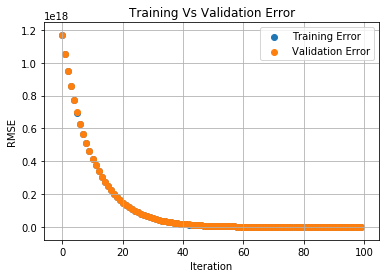

In [129]:
plt.scatter(x=training_rounds,y=eval_result['validation_0']['rmse'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['rmse'],label='Validation Error')
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.title('Training Vs Validation Error')
plt.legend()


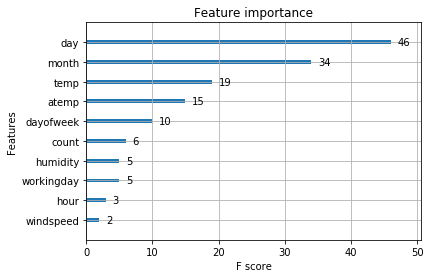

In [130]:
xgb.plot_importance(regressor)